# Оценка гипотез и результатов А/В эксперимента

**Цель проекта:** необходимо увеличить выручку компании путем внедрения улучшений

Задачи проекта: 
* приоритизировать гипотезы методами ICE, RICE
* выявить перспективные гипотезы
* запустить А/В тест
* проанализировать и визуализировать результаты

В нашем распоряжении имеется 3 датасета: 

Файл `/datasets/hypothesis.csv`

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

Файл `/datasets/orders.csv`

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1. Приоритизация гипотез

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

**Задача**

- Применить фреймворк `ICE` для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк `RICE` для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Проанализировать, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. 

Для начала посмотрим общую информацию о датасете `hypothesis.csv`. Для этого импортируем библиотеки, зададим новую переменную и посмотрим на таблицу.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt #импортируем библиотеки

In [2]:
try:
    hypo = pd.read_csv('hypothesis.csv')
except:
    hypo = pd.read_csv('/datasets/hypothesis.csv') #читаем файл с датасетом

In [3]:
pd.set_option('display.max_colwidth', None) #настройка для таблицы
hypo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Таблица содержит 9 строк и 5 столбцов. Пропущенных значений нет, ошибочных типов данных нет, дубликатов нет.

В таблице 9 гипотез и 4 параметра к каждой гипотезе.

- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Создадим новый столбец, где будет храниться оценка по фреймворку ICE.

**ICE = (Impact * Confidence) / Efforts**

In [4]:
hypo['ICE'] = hypo['Impact'] * hypo['Confidence'] / hypo['Efforts'] #добавляем столбец
hypo['ICE'] = round(hypo['ICE'], 1) #округляем значения
hypo.sort_values(by='ICE', ascending=False) #сортируем

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Самой перспективной гипотезой оказалась гипотеза №9, ее "ICE" = 16,2. <br>
На втором месте гипотеза №1 с результатом 13,3.<br>
И завершает тройку лидеров гипотеза №8 с оценкой в 11,2.<br>

Гипотезы расположились следующим образом:
1. Гипотеза 9
2. Гипотеза 1
3. Гипотеза 8
4. Гипотеза 7
5. Гипотеза 3
6. Гипотеза 2
7. Гипотеза 6
8. Гипотеза 4
9. Гипотеза 5

Таким же образом создадим столбец "RICE" с оценкой гипотезы по системе RICE.

**RICE = Reach * Impact * Confidence / Efforts**

In [5]:
hypo['RICE'] = hypo['Reach'] * hypo['Impact'] * hypo['Confidence'] / hypo['Efforts'] #добавляем столбец
hypo['RICE'] = round(hypo['RICE'], 1)
hypo.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


По оценке RICE самой перспективной гипотезой оказалсь гипотеза № 8.
На втором месте гипотеза №3.
На третьем месте гипотеза №1.

Таким образом,
1. Гипотеза 8
2. Гипотеза 3
3. Гипотеза 1
4. Гипотеза 7
5. Гипотеза 9
6. Гипотеза 4
7. Гипотеза 2
8. Гипотеза 6
9. Гипотеза 5

Так как в оценке RICE использовался параметр Reach - охват пользователей, оценки гипотез имзенились. Перспективными стали те гипотезы, которые охватывают большее количество пользователей. 

По результата двух оценок рекомендуется провести **гипотезу №8** - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

# Часть 2. Анализ A/B-теста

После проведения А/В теста были получены результаты о посещениях сайта и заказах, которые находятся в датасетах `orders.csv` и `visitors.csv`.

Необходимо:
1. Проанализировать кумулятивную выручку по группам. 
2. Проанализировать кумулятивный средний чек по группам. 
3. Проанализировать относительное изменение кумулятивного среднего чека группы B к группе A. 
4. Проанализировать кумулятивное среднее количество заказов на посетителя по группам. 
5. Проанализировать относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.
6. Построить точечный график количества заказов по пользователям.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. 
8. Построить точечный график стоимостей заказов. 
9. Посчитать 95-й и 99-й перцентили стоимости заказов. 
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
14. Принять решение по результатам теста

Введем новые переменные, которым присвоим данные из датасетов. Посмотрим первые 10 строк, и общую информацию о них.

In [6]:
try:
    orders = pd.read_csv('orders.csv')
except:
    orders = pd.read_csv('/datasets/orders.csv') #читаем файл с датасетом

In [7]:
try:
    visitors = pd.read_csv('visitors.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv') #читаем файл с датасетом

In [8]:
orders.head(10) #первые 10 строк

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
orders.info() #общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В датасете с заказами 1197 строк и 5 столбцов. Столбец с датой имеет не соответствующий тип данных. Пропусков нет.

Уберем все дубликаты и поменяем тип данных даты.

In [10]:
orders.drop_duplicates() #дубликаты

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [11]:
orders['date'] = orders['date'].map(   #тип данных
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

То же самое сделаем и для датасета с посещениями.

In [12]:
visitors.head() #первые 5 строк

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info() #общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Датасет содержит 62 строки и 3 столбца. Пропусков нет. Можно предположить, что A/B-тест проходил 31 день. 

Поменяем тип данных и удалим дубликаты.

In [14]:
visitors.drop_duplicates() #дубликаты
visitors['date'] = visitors['date'].map(   #тип данных
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Теперь проверим, есть ли одни и те же пользователи в обеих группах.

In [15]:
A = np.array(orders[orders['group']=='A']['visitorId'].unique())

B = np.array(orders[orders['group']=='B']['visitorId'].unique())

C = A[np.in1d(A, B)]

display(C)
len(C)

array([4069496402,  199603092, 3803269165, 2378935119,  237748145,
       4256040402, 2038680547, 1738359350, 2458001652, 3891541246,
       2716752286, 3656415546, 2686716486, 2954449915, 2927087541,
       3234906277,  457167155, 2579882178, 3957174400, 1648269707,
       2780786433,  818047933, 2044997962, 1959144690, 3202540741,
       1333886533,  351125977, 3951559397,  393266494, 3984495233,
       4120364173, 4266935830, 1230306981, 1294878855, 1614305549,
          8300375,  477780734, 1668030113, 3717692402, 3766097110,
       3941795274,  471551937, 1316129916, 1801183820, 1602967004,
       2587333274, 2600415354,  232979603, 3972127743, 1404934699,
        276558944, 3062433592, 2654030115, 3963646447, 4186807279,
       2712142231, 2949041841,  963407295], dtype=int64)

58

Получили `visitorId` всех пользователей, попавших и в А, и в В группы. Всего их 58.

При проведении теста скорее всего были допущены технические ошибки и 58 пользователям показывали оба варианта теста. 

Если удалить таких пользователей из таблицы `orders`, получится исключить их из обеих групп. Но в таком случае уже не получится удалить их из таблицы `visitors`, так как данные о пользователях в ней агрегированы за день. Будет неверным удалить их только из одной таблицы. Исходя из этого, принято решение не удалять таких пользователей.

## Сбор кумулятивных данных

### Кумулятивная выручка по группам

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [17]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [18]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

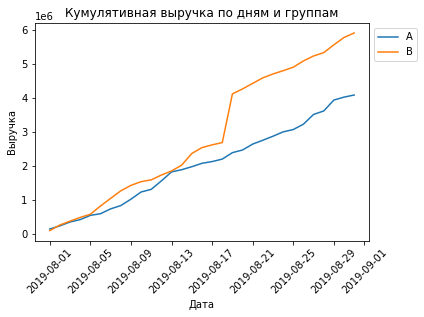

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation = 45)
plt.title('Кумулятивная выручка по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

По результатам за 31 день по кумулятивной выручке резко лидирует группа В. Также заметен резкий скачок в середине месяца, вероятно присутствуют аномально большие заказы.

### Кумулятивный средний чек по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

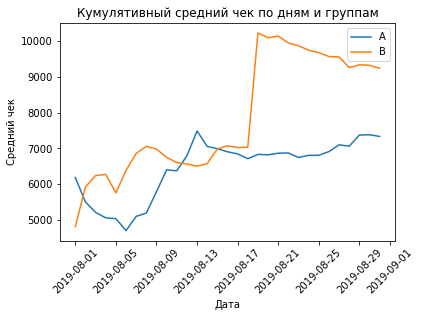

In [20]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A') #график группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B') #график группы В

plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation = 45)
plt.title('Кумулятивный средний чек по дням и группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Как и в случае с выручкой, лидирует группа B. И так же, как в кумулятивной выручке - присутствуют резкие скачки графика, что свидетельствует о заказах большой стоимости. Линия графика группы А более стабильна к концу теста.

### Относительное изменение кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека.

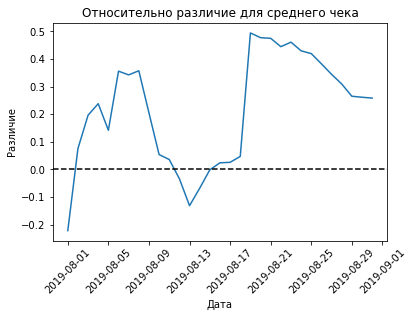

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 45)
plt.title('Относительно различие для среднего чека')
plt.xlabel('Дата')
plt.ylabel('Различие')
plt.show()

Средний чек группы В значительно больше. Как и на графиках выше резкие скачки линии графика символизируют об аномально дорогих покупках.

### Кумулятивное среднее количество заказов на посетителя по группам

Аналогично проанализируем график среднего количества заказов на посетителя по группам.

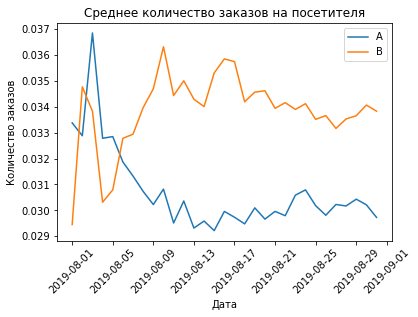

In [22]:
# считаем среднее количество заказов на посетителя
cumulativeData['mean_orders'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['mean_orders'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['mean_orders'], label='B')
plt.legend()
plt.xticks(rotation = 45)
plt.title('Среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel("Количество заказов")
plt.show()


График среднего количества заказов на пользователя по группам получился симметричным, однако линии расположены далеко друг от друга, что говорит о неоднородности количества заказов в группе.

### Относительное изменение кумулятивного среднего количества заказов на посетителя 
Построим график относительного различия кумулятивных конверсий:

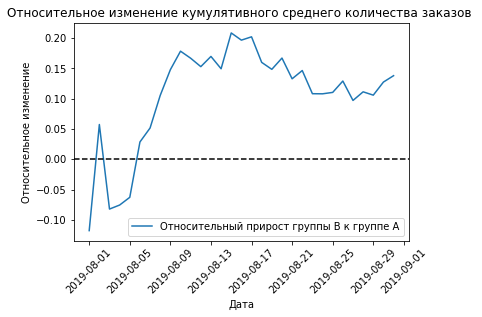

In [23]:
#собираем данные
mergedCumulativeConversions = cumulativeDataA[['date','mean_orders']].merge(cumulativeDataB[['date','mean_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['mean_ordersB']/mergedCumulativeConversions['mean_ordersA']-1, label="Относительный прирост группы B к группе A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 45)
plt.title('Относительное изменение кумулятивного среднего количества заказов ')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.show()



В начале теста группа В проигрывала, затем резко оторвалась от группы А и продолжила быть в лидерах. Такой резкий рост может быть из-за аномально больших заказов в группе В.

### Точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям и посмотрим на результат:

In [24]:
#новый датасет с количеством заказов по пользователю
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders'] #переименуем столбцы

In [25]:
ordersByUsers.sort_values(by='orders', ascending=False).head(10) #сортируем

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, совершившие по 8-11 заказов. Это много, относительно других пользователей. 

Построим точечную диаграмму числа заказов на одного пользователя:

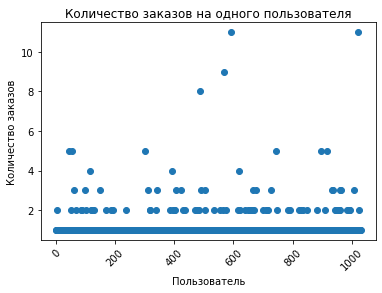

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers))) #формируем ось х

plt.scatter(x_values, ordersByUsers['orders']) 
plt.xticks(rotation = 45)
plt.title('Количество заказов на одного пользователя')
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.show()

Выводы подтверждаются: много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем выборочные перцентили (95 и 99) количества заказов на одного пользователя:

In [27]:
np.percentile(ordersByUsers['orders'], [95, 99]) #считаем перцентили

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказов. И 1% пользователей заказывали более 4 раз. 

Разумно выбрать 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Точечный график стоимостей заказов
Изучим диаграмму рассеяния распределения стоимостей заказов: 

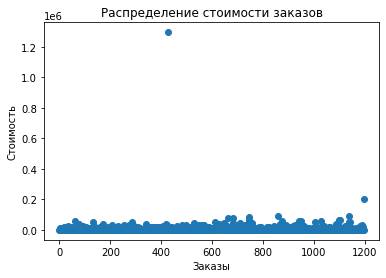

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])  #диаграмма рассеяния
plt.title('Распределение стоимости заказов')
plt.xlabel("Заказы")
plt.ylabel("Стоимость")
plt.show()

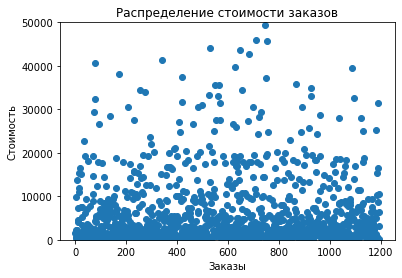

In [48]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])  #диаграмма рассеяния
plt.title('Распределение стоимости заказов')
plt.xlabel("Заказы")
plt.ylabel("Стоимость")
plt.ylim([0, 50000])
plt.show()

На первом графике видно, что всего 2 заказа визуально выбиваются из общей "кучи" заказов.

###  95-й и 99-й перцентили стоимости заказов
Как и в случае с количеством заказов, посчитаем 95 и 99 перцентиль (5% и 1% соответственно).

In [30]:
np.percentile(orders['revenue'], [95, 99]) #считаем перцентили

array([28000. , 58233.2])

Получается, что всего 5% пользователей заказывают на сумму больше 28 000 у.е. И всего 1% пользователей больше, чем 58 233 у.е.

Таким образом, можно выделить границу для аномальных значений в 28000.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. 
* Нулевая: различий в среднем количестве заказов между группами нет. 
* Альтернативная: различия в среднем между группами есть.

Тест, которым проверяются гипотезы: критерий Манна-Уитни

Уровень статистической значимости: 0,05

Создадим большую таблицу со всеми "сырыми" данными.

* `date` — дата;
* `ordersPerDateA` — количество заказов в выбранную дату в группе A;
* `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
* `ordersPerDateB` — количество заказов в выбранную дату в группе B;
* `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
* `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
* `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
* `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
* `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
* `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
* `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
* `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
* `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']] #отделяем группу А
visitorsADaily.columns = ['date', 'visitorsPerDateA'] #переименовываем

visitorsACummulative = visitorsADaily.apply(   #количество пользователей до выбранной даты включительно в группе A
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']] 
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply( #количество пользователей до выбранной даты включительно в группе B.
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,20,148579,21,101217,20,148579,21,101217,719,713,719,713
1,2019-08-02,19,93822,24,165531,39,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,63,354874,61,380996,507,509,1845,1803
3,2019-08-04,15,70825,17,108571,78,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,103,549917,101,581995,756,707,3318,3280


Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

Выведем относительный прирост среднего числа заказов группы B: среднее число заказов группы B / среднее число заказов группы A - 1.  Округлим до трёх знаков после запятой.

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительное различие: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

p-value: 0.017
Относительное различие: 0.138


Первое число — `p-value` = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 13,8% — второе число в выводе.

Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. 
* Нулевая гипотеза: различий в среднем чеке между группами нет. 
* Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [33]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительное различие: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A, что было выявлено выше.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Для того, чтобы получить очищенные от аномалий данные, необходимо определить границы "нормальности" и убрать несоответствующие данные.

Выше было определено, что верхней границей для количества заказов на пользователя примеи 3 заказа. 
Верхней границей для суммы покупки будет 28000. 

Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. 

Сделаем срезы пользователей с числом заказов больше 3 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`. 

Для оценки статистической значимости различий будем применять **статистический критерий Манна-Уитни** к полученным выборкам.


In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [35]:
abnormalUsers.shape[0]

63

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Применим статистический критерий Манна-Уитни к полученным выборкам:

In [37]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница: {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.018
Относительная разница: 0.148


Разницы между p-value сырых данных и очищенных практически нет. 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным


Точно так же рассчитаем статистическую значимость различий в среднем чеке с помощью критерия Манна-Уитни.

In [38]:
print(
    'p-value: {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительная разница: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.977
Относительная разница: -0.017


P-value увеличился, разница между сегментами сократилась с 25% практически до нуля. Группа А даже обходит группу В по среднему чеку на 1,7%.

### Решение по результатам теста

Имеющиеся факты:
* Есть статистически значимое различие по среднему количеству заказов между группами по «сырым» и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению
* График различия среднего чека говорит о том, что результаты группы А ухудшаются день ото дня

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В — практически нулевая.

# Общий вывод

Целью проекта было увеличение выручки компании путем введения некоторых маркетинговых улучшений. Для этого было сформировано 9 гипотез, каждой из которых присвоены 4 оценки: Reach (охват пользователей), Impact (влияние), Confidence (уверенность в гипотезе) и Efforts (затраты).

В ходе анализа гипотез были рассчитаны две оценки: по методу ICE и по методу RICE. 

* По методу ICE лидером оказалась гипотеза "Запустить акцию, дающую скидку на товар в день рождения". 
* По методу RICE: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

На основе имеющихся оценок компании рекомендовано протестировать гипотезу "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

После проведения А/В теста были получены результаты о посещениях сайта и о заказах. На основе этих данных была выполнена предобработка, а также:
1. проанализированы кумулятивные метрики, такие как выручка и средний чек по группам.
    1. Кумулятивная выручка лучше у группы В.
    2. Средний чек выше у группы В.
    3. Относительное изменение группы В значительно выше группы А.
    4. Среднее количество заказов на посетителя выше у группы В.
2. проанализированы графики количества заказов по пользователям.
    1. Основное количество заказов между 1-3 заказами. Присутствует доля аномально больших заказов - от 8 до 11.
    2. 5% пользователей заказывали более 2 раз, 1% пользователей более 4.
3. проанализированы графики среднего чека по группам.
    1. Медиана среднего чека - около 3 000 у.е.
    2. 5% пользователей заказывали более, чем на 28 000 у.е. 1% пользователей заказывал больше, чем на 58 233 у.е.
4. проанализирована статистическая значимость различий по "сырым" данным с помощью критерия Манна-Уитни
    1. различия в количестве заказов есть
    2. различий в среднем чеке нет.
5. проанализирована статистическая значимость различий по "очищенным" данным с помощью критерия Манна-Уитни
    1. различия в количестве заказов есть
    2. различий в среднем чеке нет.

По итогам анализа принято решение остановить тест, признать его успешным: группа В значительно лучше группы А.

Также рекомендуется более тщательно проверять пользователей, попавших в группы теста - 58 пользователей оказались в обеих группах, что повлияло на результаты теста.